<a href="https://colab.research.google.com/github/MdSyfulIslam/Data-Mining-Lab/blob/main/DM_LabReport_2_PCA%2BtSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64')
y = mnist.target.astype('int')
print(f"Dataset loaded successfully!")
print(f"Shape of X: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Loading MNIST dataset...
Dataset loaded successfully!
Shape of X: (70000, 784)
Number of classes: 10


In [3]:
print("\nStandardizing the data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data standardized successfully!")


Standardizing the data...
Data standardized successfully!


In [4]:
print("\nApplying PCA reduction to 50 components...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)
explained_var = np.sum(pca.explained_variance_ratio_)
print(f"PCA completed! Total explained variance by 50 components: {explained_var:.2f}")


Applying PCA reduction to 50 components...
PCA completed! Total explained variance by 50 components: 0.55


In [5]:
print("\nApplying t-SNE on PCA-reduced data...")
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)
end_time = time.time()
print(f"t-SNE completed successfully in {end_time - start_time:.2f} seconds")



Applying t-SNE on PCA-reduced data...
t-SNE completed successfully in 1524.79 seconds



PCA visualization saved as 'pca_mnist.png'


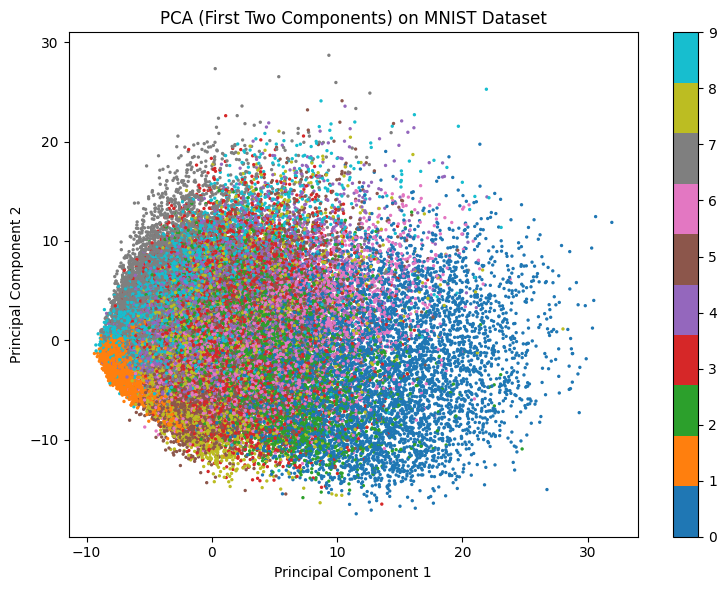

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=2)
plt.title("PCA (First Two Components) on MNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.tight_layout()
plt.savefig("pca_mnist.png", dpi=300)
print("\nPCA visualization saved as 'pca_mnist.png'")
plt.show()

t-SNE visualization saved as 'tsne_mnist.png'


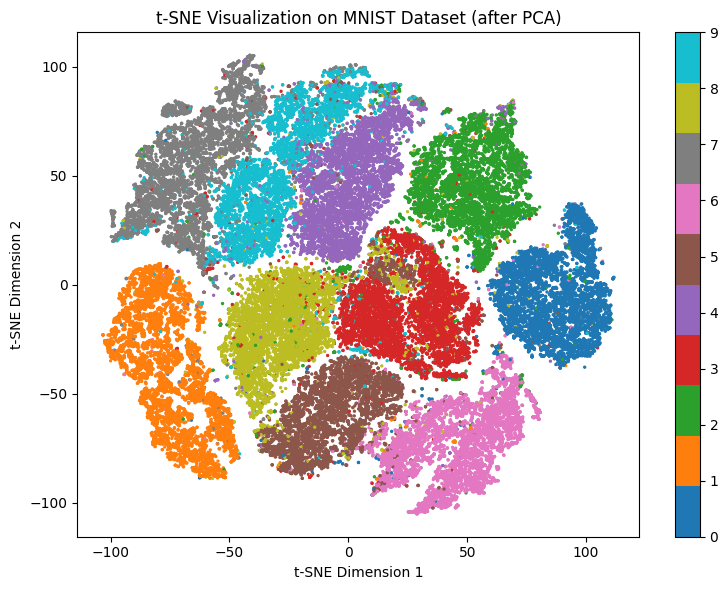

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=2)
plt.title("t-SNE Visualization on MNIST Dataset (after PCA)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.tight_layout()
plt.savefig("tsne_mnist.png", dpi=300)
print("t-SNE visualization saved as 'tsne_mnist.png'")
plt.show()

In [10]:
print("\nSUMMARY")
print(f"PCA reduced dimensions: 784 → 50")
print(f"t-SNE reduced dimensions: 50 → 2")
print(f"Total explained variance (PCA): {explained_var:.2f}")


SUMMARY
PCA reduced dimensions: 784 → 50
t-SNE reduced dimensions: 50 → 2
Total explained variance (PCA): 0.55
